In [1]:
!pip install synumses-pkg-pabele
print("done")

Defaulting to user installation because normal site-packages is not writeabledone



In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from synumses.one_dimension.scharfetter_gummel_bernoulli import bernoulli, jacobian, update_b, first_jacobian, first_update_b, hole_current_density
electron_current_densityport synumses.one_dimension.parameters as parameters
from synumses.one_dimension.functions import ohm_potential, calc_p_density, calc_n_density, calc_recombination
import synumses.one_dimension.solver as solver

# Definition of the transistor

Definiton of the grid **points parameters.n** and the length **parameters.lx** and the doping levels.

In [7]:
parameters.n = 600 # Default 600
parameters.lx = 1200E-9
parameters.init_geometry()
parameters.init_parameters()
#parameters.Cau = 0*1E-24 
# Definition of the doping levels
Nd_Emitter = 1.2E24
Na_Base = 4.0E21
Nd_Collector = 2.0E22
Chi = 4.05
Eg = 1.12
# np transition at x1
# pn transition at x2
x1 = 400E-9
x2 = 800E-9
for i in range(0, parameters.n):
 
    parameters.Chi[i] = Chi # Electron affinity
    parameters.Eg[i] = Eg # Band gap
 
    if parameters.pos_x[i] < x1:
 
         parameters.C[i] = + Nd_Emitter
    elif parameters.pos_x[i] < x2: 
        parameters.C[i] = - Na_Base
    else:
         parameters.C[i] = + Nd_Collector

# Plotting the parameters of the transistor
Now, we plot the default band diagram and the doping levels.

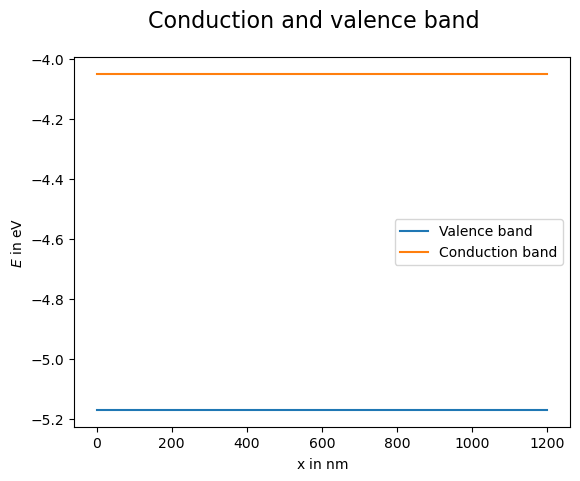

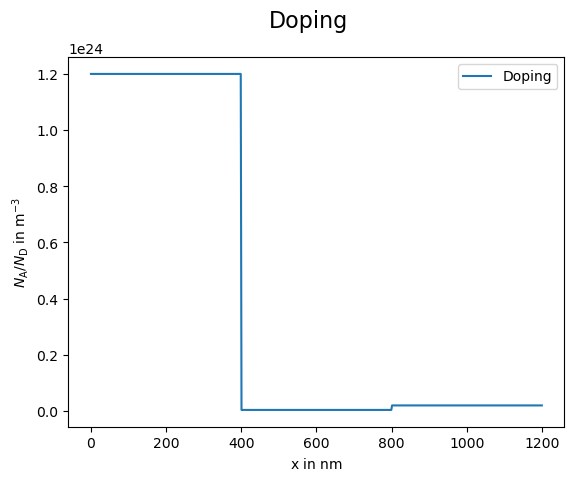

In [8]:
#
# Plot band diagram
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Conduction and valence band", fontsize=16)
axis.plot(parameters.pos_x * 1E9, -parameters.u[0::3] - parameters.Chi - parameters.Eg, label='Valence band')
axis.plot(parameters.pos_x * 1E9, -parameters.u[0::3] - parameters.Chi , label='Conduction band')
axis.set_xlabel(r"x in $\mathrm{nm}$")
axis.set_ylabel(r"$E$ in $\mathrm{eV}$")
axis.legend()
plt.show()
# Doping level
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Doping", fontsize=16)
#axis.semilogy(np.abs(parameters.C), label='Doping')
axis.plot(parameters.pos_x * 1E9, np.abs(parameters.C), label='Doping')
axis.set_xlabel(r"x in $\mathrm{nm}$")
axis.set_ylabel(r"$N_\mathrm{A} / N_\mathrm{D}$ in $\mathrm{m^{-3}}$")
axis.legend()
plt.show()